# Loading Libraries/Packages

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers

# Data Importation & View

In [3]:
dataset = pd.read_csv("C:\\Users\C\Downloads\Phishing_Legitimate_full.csv")

In [4]:
dataset.shape #to check the number of records and attributes

(10000, 50)

In [5]:
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [7]:
dataset.isnull().sum() #To confirm the lack of missing values

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [8]:
#From the result above, it can be seen that the dataset has no missing values since the non-null Count is equal to the number of entries

In [9]:
column_list = dataset.columns.values.tolist()
i_v = pd.DataFrame({'Independent Variables':column_list[:-1]})
i_v.index+=1
i_v

,Independent Variables
1,id
2,NumDots
3,SubdomainLevel
4,PathLevel
5,UrlLength
6,NumDash
7,NumDashInHostname
8,AtSymbol
9,TildeSymbol
10,NumUnderscore


In [10]:
column_list = dataset.columns.values.tolist()
v = pd.DataFrame({'Dependent Variable':column_list[-1:]})
v.index+=1
v

,Dependent Variable
1,CLASS_LABEL


In [11]:
# To do some Exploratory Data Analysis

In [12]:
dataset.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Doing some exploration on the Y-variable
dataset.CLASS_LABEL.value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

<AxesSubplot:xlabel='CLASS_LABEL', ylabel='count'>

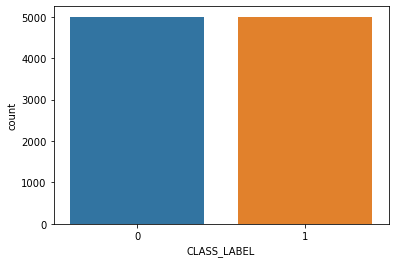

In [14]:
#To view the Class_Label distribution
sns.countplot(data=dataset, x='CLASS_LABEL')

In [15]:
#From the above result, it can be immediately seen that the Class Label is split evenly between legitimate and Phishing webpages

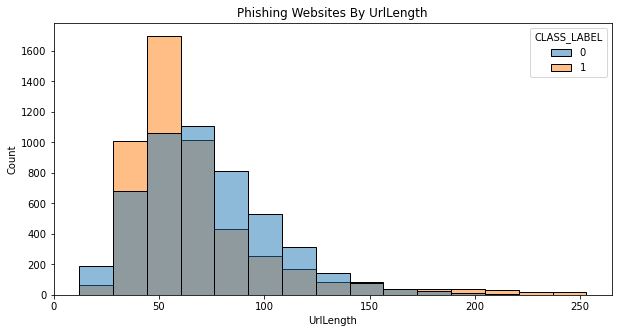

In [16]:
plt.figure(figsize=(10,5))
plt.title('Phishing Websites By UrlLength')
sns.histplot(data=dataset, hue='CLASS_LABEL', x='UrlLength', bins=15)
plt.show()

<AxesSubplot:xlabel='NoHttps', ylabel='count'>

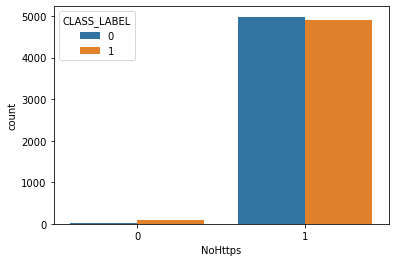

In [17]:
#To see how the NoHttps attribute is distributed and its proportion in the CLASS_LABEL
sns.countplot(data=dataset, x='NoHttps', hue='CLASS_LABEL')

In [18]:
#Defining a function to show me the histogram and boxplot views of some selected Variables
plot_Var = ['NumDots', 'NumNumericChars', 'PathLevel', 'PathLength', 'QueryLength', 'SubdomainLevel']
def chart_plot(plot_type):
    if plot_type=='histogram':
        plt.figure(figsize=(18,9))
        for i in range(len(plot_Var)):
            plt.subplot(2,3,i+1)
            sns.histplot(data=dataset, hue='CLASS_LABEL', x=plot_Var[i], bins=15)
    elif plot_type=='boxplot':
        plt.figure(figsize=(18,9))
        for i in range(len(plot_Var)):
            plt.subplot(2,3,i+1)
            sns.boxplot(data=dataset, hue='CLASS_LABEL', x=plot_Var[i], showmeans=True)
    else:
        pass

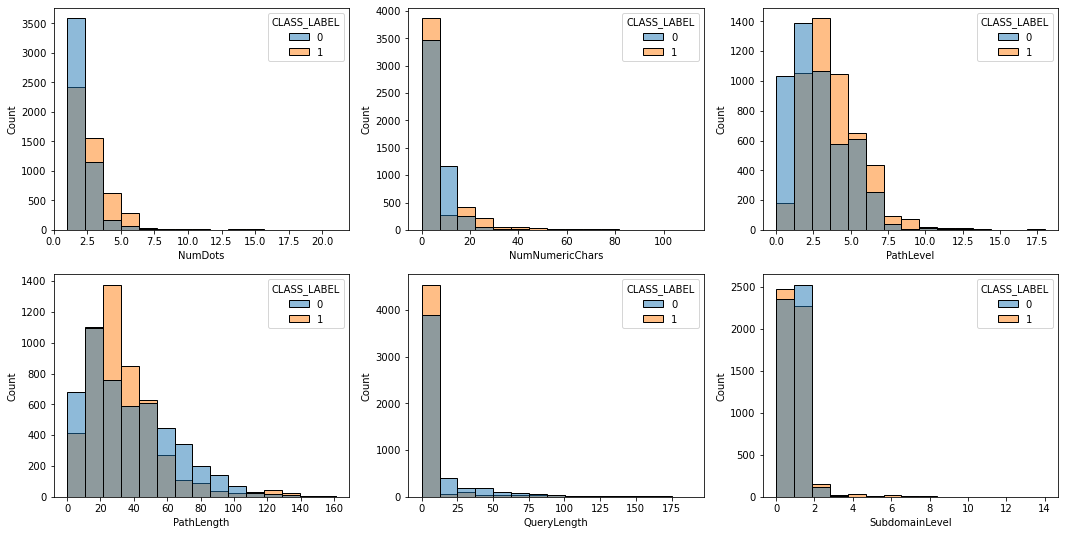

In [19]:
#To quickly examine the distribution between some variables and the Class Label.
chart_plot('histogram')

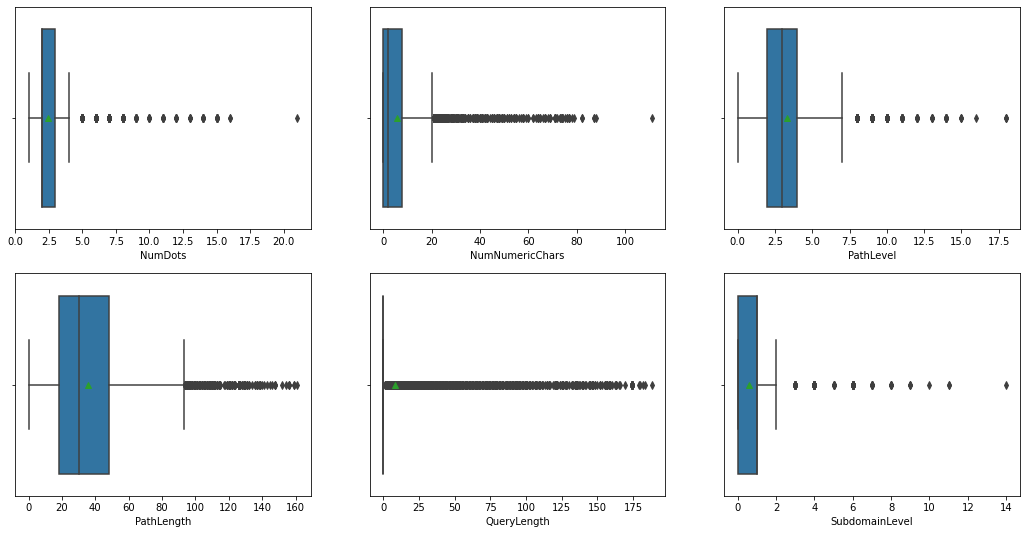

In [20]:
#To have a quick view on outlier values using a boxplot
chart_plot('boxplot')

<Figure size 1080x720 with 0 Axes>

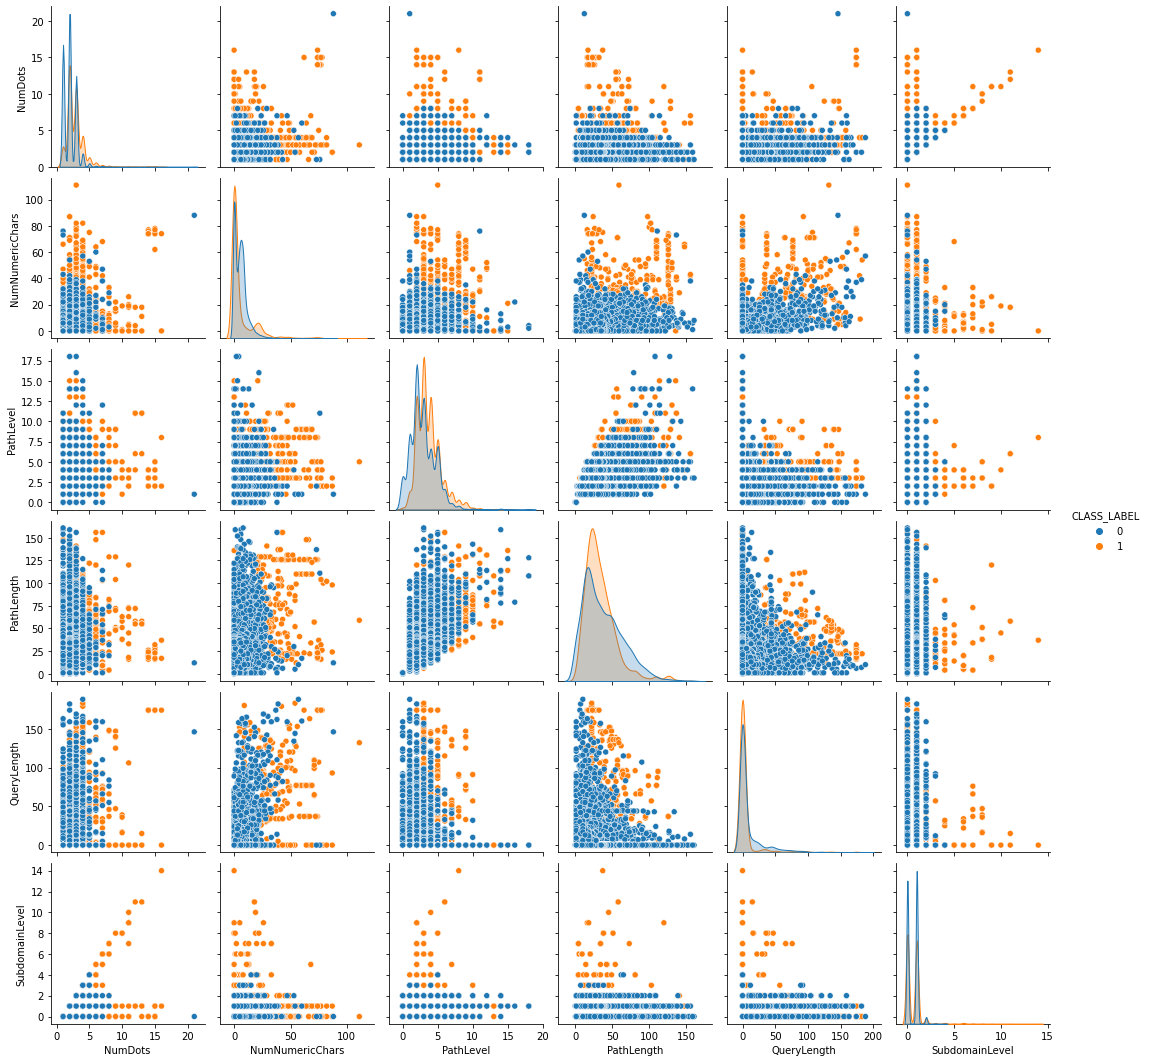

In [21]:
#To get the relationship between the above selected variables and the Class Label, we plot a scatterplot matrix
plt.figure(figsize=(15,10))
sns.pairplot(dataset[['NumDots', 'NumNumericChars', 'PathLevel', 'PathLength', 'QueryLength', 'SubdomainLevel', 'CLASS_LABEL']],
             hue='CLASS_LABEL')
plt.show()

# Feature Improvement

In [22]:
dataset1 = dataset.drop('id', axis=1) #Drop the ID column (since it is not an attribute to be considered in the classification)
dataset1 = dataset1.rename(columns={'CLASS_LABEL':'Result'}) #Renaming the CLASS_LABEL column
dataset1.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Result
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# k-Nearest Neighbors (KNN) Classification

In [23]:
#Split the data columns into arrays containing attributes and another containing results
X = dataset1.iloc[:, 0: len(dataset1.columns.tolist())-1]
y = dataset1.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y) #Stratify keeps the split percentage constant in both training and testing

In [25]:
#To fit_transform the train values and transform the test values
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train) #This returns a numpy array, and that is because numpy arrays are faster to process than dataframes
X_test_s=sc.transform(X_test)

In [26]:
#Using the KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
class_model = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2, n_jobs=-1) #n_jobs =-1 maximizes CPU capacity to make processing faster
class_model.fit(X_train_s, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

## Evaluating the Model Performance

In [27]:
y_pred = class_model.predict(X_test_s)
print(y_pred)

[1 1 0 ... 0 1 1]


accuracy:0.96


Confusion Matrix
[[1428   72]
 [  48 1452]] 


Classification Report:
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1500
           1       0.95      0.97      0.96      1500

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



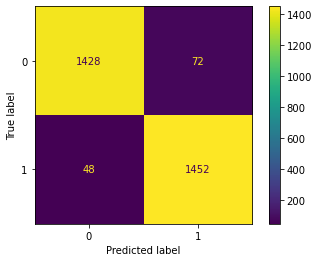

In [28]:
acc=accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm,'\n\n')
print('=======================================================')
result=classification_report(y_test,y_pred)
print('Classification Report:')
print('-------------------------------------------------------')
print(result)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_model.classes_)
disp.plot()
plt.show()

### Choosing the Best Hyperparameters (Hyperparameter Tuning)

In [29]:
knn2=KNeighborsClassifier()
hyperparameters={'n_neighbors': (1,12,1), 'metric': ('minkowski', 'chebyshev')}

knn_cv = GridSearchCV(knn2, hyperparameters, n_jobs=-1, verbose=1)
knn_cv.fit(X_train_s, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 12, 1)},
             verbose=1)

In [30]:
knn_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 1}

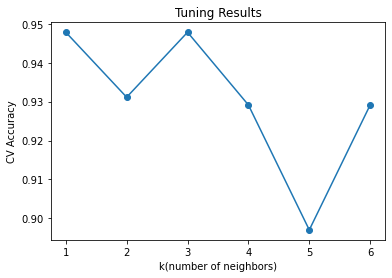

In [31]:
tuning_result=knn_cv.cv_results_['mean_test_score']
plt.plot(range(1,7), tuning_result, 'o-')
plt.ylabel('CV Accuracy')
plt.xlabel('k(number of neighbors)')
plt.title('Tuning Results')
plt.show()

In [32]:
tuning_result

array([0.94785714, 0.93114286, 0.94785714, 0.92914286, 0.897     ,
       0.92914286])

### Predicting with best k for comparison

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1500
           1       0.96      0.96      0.96      1500

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Estimated Value Confusion Matrix
**********************************************


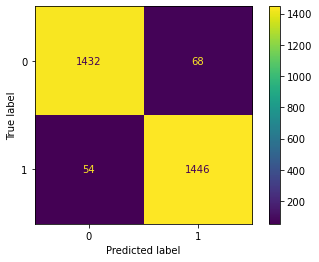

In [33]:
predict_best = knn_cv.best_estimator_.predict(X_test_s)
print(classification_report(y_test, predict_best))
print("==============================================")
print("Estimated Value Confusion Matrix\n**********************************************")
cm2 = confusion_matrix(y_test, predict_best)
disp=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_model.classes_)
disp.plot()
plt.show()

# NEURAL NETWORK

In [34]:
X_train_NN = X_train_s.copy()
X_test_NN = X_test_s.copy()

### Model Building

In [35]:
X_train_NN.shape[1] #To get the number of features for the input Layer

48

In [36]:
#This step is to make sure the results can be reproduced and do not change each time the model is run
def set_seed(seed=20):
    np.random.seed(seed) #to seed from everything in numpy
    random.seed(seed) #to seed from everything in Python itself
    tf.random.set_seed(seed) #seeds randomness from anything in tensorflow

In [37]:
set_seed()
model = tf.keras.models.Sequential() #The Sequential here is the type of API we're using 
model.add(tf.keras.layers.Dense(30,activation='relu',input_shape=(X_train_NN.shape[1],))) #Only the input shape needs to be specified, following layers can infer shape automatically
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Sigmoid is used for binary classifications where we only have 2 mutually exclusive classes theefore 1 node
#when writing report, check how to determine the optimum number of input neurons ("20" in line 2)
model.summary()
#The number of parameters is gotten by multiplying the number of hidden layer nodes by the number of input features + bias (1 per node)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1470      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics='accuracy') #binary_crossentropy Because there are only 2 classes, and accuracy metrics because my class is balanced

In [39]:
history = model.fit(X_train_NN, y_train,
                    batch_size = 10, 
                    epochs= 30,
                    verbose=2,
                    validation_split=0.2) #didn't specify class weight because my class is balanced

Epoch 1/30
560/560 - 7s - loss: 0.3010 - accuracy: 0.8875 - val_loss: 0.1710 - val_accuracy: 0.9400 - 7s/epoch - 13ms/step
Epoch 2/30
560/560 - 1s - loss: 0.1635 - accuracy: 0.9405 - val_loss: 0.1328 - val_accuracy: 0.9521 - 1s/epoch - 2ms/step
Epoch 3/30
560/560 - 1s - loss: 0.1381 - accuracy: 0.9471 - val_loss: 0.1183 - val_accuracy: 0.9600 - 966ms/epoch - 2ms/step
Epoch 4/30
560/560 - 1s - loss: 0.1240 - accuracy: 0.9511 - val_loss: 0.1110 - val_accuracy: 0.9593 - 1s/epoch - 2ms/step
Epoch 5/30
560/560 - 1s - loss: 0.1106 - accuracy: 0.9571 - val_loss: 0.0990 - val_accuracy: 0.9614 - 985ms/epoch - 2ms/step
Epoch 6/30
560/560 - 1s - loss: 0.1009 - accuracy: 0.9611 - val_loss: 0.0942 - val_accuracy: 0.9636 - 1s/epoch - 2ms/step
Epoch 7/30
560/560 - 1s - loss: 0.0915 - accuracy: 0.9659 - val_loss: 0.0891 - val_accuracy: 0.9664 - 970ms/epoch - 2ms/step
Epoch 8/30
560/560 - 1s - loss: 0.0847 - accuracy: 0.9684 - val_loss: 0.0848 - val_accuracy: 0.9693 - 967ms/epoch - 2ms/step
Epoch 9/30


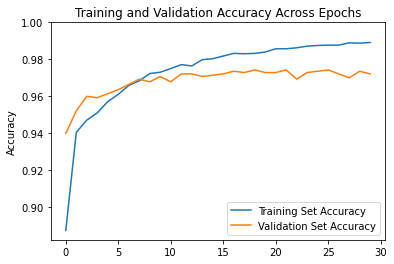

In [40]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

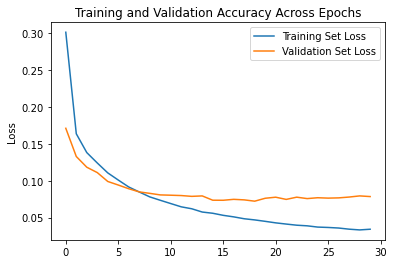

In [41]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [42]:
model.evaluate(X_test_NN, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9737


[0.07876517623662949, 0.9736666679382324]

In [43]:
y_pred = model.predict(X_test_NN)

94/94 [==============================] - 0s 2ms/step


In [44]:
nn_pred = np.round(model.predict(X_test_NN)) #to convert the probability results to binary output where less than 0.5 is 0, greater than or equal to 0.5 is 1

94/94 [==============================] - 0s 2ms/step


In [45]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1500
           1       0.97      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [46]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy=accuracy_score(y_true=y_true, y_pred=y_pred)
    precision=precision_score(y_true=y_true, y_pred=y_pred)
    recall=recall_score(y_true=y_true, y_pred=y_pred)
    f1=f1_score(y_true=y_true, y_pred=y_pred)
    
    scored_df =pd.DataFrame({
        model_name:[accuracy, precision, recall, f1]},
        index=['Accuracy','Precision','Recall','f1'])
    return scored_df

In [47]:
knn_pred_test = evaluate_model(y_test, predict_best, 'k-Nearest Neighbors')
nn_pred_test = evaluate_model(y_test, nn_pred, 'Neural Network')

In [48]:
pd.concat([knn_pred_test,nn_pred_test], axis=1)

,k-Nearest Neighbors,Neural Network
Accuracy,0.959333,0.973667
Precision,0.955086,0.973351
Recall,0.964000,0.974000
f1,0.959522,0.973675
